In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

### This notebook is used to make the plots generated by the v2 bftt model (the one with logistic death properly implemented)

In [2]:
max_gRate = 0.083 #max growth rate of the bacteria
K = 1000 #carrying capacity for the regular simulations
big_K = 10000 #carring capacity for the big_K simulations
duration_fig4 = 100. #duration of the simulations used for the figure 4 plots

r_imm_fig4 = [0.55, 0.6, 0.65] # immigration ratios used in figure 4

In [3]:
def readDeterministicData(filepath):
    '''
    method to read in Chris' deterministic data into pandas dataframe.
    Need to set delimiter to space, and also deal with the leading whitespace in the 1st column which produces a column of NaNs
    '''
    df = pd.read_csv(filepath, sep=" ", header=None, names=["blank", 't', 'N_edge', 'N'])
    df = df.drop(columns=['blank'])
    #truncate the data so that it's for the same duration as the stochastic ones
    return df[df['t'] < duration_fig4*max_gRate]

In [4]:
# Chris' deterministic data
#fig4c - N* = 1.17 
fig4c_rImm_0_55_deterministic = readDeterministicData('../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns1.17.dat')
fig4c_rImm_0_6_deterministic  = readDeterministicData('../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns1.17.dat')
fig4c_rImm_0_65_deterministic = readDeterministicData('../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.65_ns1.17.dat')

fig4c_pops_deterministic = [fig4c_rImm_0_55_deterministic, fig4c_rImm_0_6_deterministic, fig4c_rImm_0_65_deterministic]


#fig4d - N* = 0.7 (this is actually for fig4a/b but it used to be fig4d, hence the name. kept this way out of convenience)
fig4d_rImm_0_55_deterministic = readDeterministicData('../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns0.7.dat')
fig4d_rImm_0_6_deterministic  = readDeterministicData('../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns0.7.dat')
fig4d_rImm_0_65_deterministic = readDeterministicData('../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.65_ns0.7.dat')

fig4d_pops_deterministic = [fig4d_rImm_0_55_deterministic, fig4d_rImm_0_6_deterministic, fig4d_rImm_0_65_deterministic]

In [5]:
# my stochastic data (now with logistic death done properly (I hope))
# fig 4c - N* = 1.17
fig4c_rImm_0_55_v2 = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_55-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_6_v2  = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_6-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_65_v2 = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_65-stochastic_pop_over_time_v2.csv")

fig4c_pops_stochastic_v2 = [fig4c_rImm_0_55_v2, fig4c_rImm_0_6_v2, fig4c_rImm_0_65_v2]



# the old stochastic data for N* < K should still be ok (I think), as the logistic death issue only arises when N > K
# fig 4d - N* = 0.7
fig4d_rImm_0_55 = pd.read_csv("../biofilm_threshold_theory/allen_presentation_bigK/ratios4d_rImmig_0_55-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_6  = pd.read_csv("../biofilm_threshold_theory/allen_presentation_bigK/ratios4d_rImmig_0_6-stochastic_pop_over_time.csv", delimiter=", ", engine='python')
fig4d_rImm_0_65 = pd.read_csv("../biofilm_threshold_theory/allen_presentation_bigK/ratios4d_rImmig_0_65-stochastic_pop_over_time.csv", delimiter=", ", engine='python')

fig4d_pops_stochastic = [fig4d_rImm_0_55, fig4d_rImm_0_6, fig4d_rImm_0_65] 


In [73]:
def compareNThresh(r_imms, pops_low_ratio_deterministic,  pops_high_ratio_deterministic, pops_low_ratio_stochastic, pops_high_ratio_stochastic, fig_filename, K_value=10000):
    
    fig, axs = plt.subplots(2,2, figsize=(7.6,6), dpi=220, sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.3, wspace=0.1)
    K_val = 10000
    i = 0
    letters = ['a', 'b', 'c', 'd']
    N_threshs = [0.7, 1.17]
    
    pop_datasets_stochastic = [pops_low_ratio_stochastic, pops_high_ratio_stochastic]
    pop_datasets_deterministic = [pops_low_ratio_deterministic, pops_high_ratio_deterministic]
    all_pop_datasets = [pops_low_ratio_stochastic, pops_low_ratio_deterministic, pops_high_ratio_stochastic, pops_high_ratio_deterministic]
    
    colourmaps = [pl.cm.RdPu, pl.cm.summer_r, pl.cm.Blues]
    colors_deterministic = ["#9900cc", "#29a329", "#3333ff"]
    lines = ["-","--","-.",":"]
    alphas = [1., 1., 1.]
    z_orders = [1., 2., 3.]
    
    for i, (ax, pop_datasets) in enumerate(zip(axs.flatten(), all_pop_datasets)):
        
        # plot all the stochastic datasets
        if not i%2:
            
            z_order=0
            for r_imm, pop_dataset, c_map, alpha, z_order in zip(r_imms, pop_datasets, colourmaps, alphas, z_orders):
                
                nCols = len(pop_dataset.columns) - 1
                
                line_colours = c_map(np.linspace(0.3, 1, nCols))
                linecycler = cycle(lines[::(-1)**i])
                
                pop_dataset = pop_dataset.dropna()
                
                for p, line_colour in enumerate(line_colours):

                    pop_dataset_num = pd.to_numeric(pop_dataset[str(p)], errors='coerce')
#                     if z_order > 1:
#                         z_order = z_orders[0]+np.random.rand()
                        
                    ax.plot(pop_dataset['t']*max_gRate, pop_dataset_num/K_value, lw=3, color=line_colour, ls=next(linecycler), label=r_imm, zorder=-z_order, alpha=alpha)
                    
                z_order+=1
                
        
        # plot the deterministic model curves          
        else:
            z_order=0
            for pop_dataset, color_det, r_imm in zip(pop_datasets, colors_deterministic, r_imms):
                                
                ax.plot(pop_dataset['t'], pop_dataset['N'], lw=3.4, color=color_det, label=r_imm, zorder=-z_order)

                z_order+=1
                
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[::-1], labels[::-1], title=r'$r_{im}/Kg$', fontsize=12, title_fontsize=15, edgecolor='k')
    
    
        # DELETED A CHUNK OF CODE HERE, CHECK allen_presentation_plots IF YOU NEED IT BACK
        
        ax.axhline(N_threshs[i//2], lw=2.6, c='r', ls="--", alpha=0.8)
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.set_ylim(0, 3.1)
        ax.set_xlim(0,8.1)
        ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
        ax.set_title("N*/K = "+str(N_threshs[i//2]), fontsize = 20)
        ax.set_xlabel("gt", fontsize=24, labelpad=-5)
        ax.set_ylabel("N$_{tot}$/K", fontsize=24)
        ax.label_outer()
        
        i = i+1

    plt.savefig(f'paper_plots_v2/{fig_filename}.pdf', bbox_inches="tight", dpi=330)
    plt.show()

In [74]:
#compareNThresh(r_imm_fig4, fig4d_pops_deterministic, fig4c_pops_deterministic, fig4d_pops_stochastic, fig4c_pops_stochastic_v2, 'fig4_N_thresh_comparison_v2')

### The inclusion of logistic death essentially means that the immigration rate needs to be increased to obtain the same results as for the pseudologistic models.  

### It appears that increasing the values of rImm used from rImm = (0.55, 0.6, 0.65) -> (0.7, 0.75, 0.78) should be able to approximately reproduce the old Figure 4 (seen above)

# Figure 4 Updated: rImm = 0.7, 0.75, 0.783

(the N*=0.7 plots (a, b) are actually 0.784, but the difference is minimal so I think we can get away with it.  Redo if needs be).

In [75]:
# My deterministic data (created using Chris' code)
#fig4c - N* = 1.17 
fig4c_rImm_0_65_deterministic = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.650_Ns1.17.dat')
fig4c_rImm_0_7_deterministic  = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.700_Ns1.17.dat')
fig4c_rImm_0_725_deterministic= readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.725_Ns1.17.dat')
fig4c_rImm_0_75_deterministic = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.75_ns1.17.dat')
fig4c_rImm_0_78_deterministic = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.780_Ns1.17.dat')
fig4c_rImm_0_783_deterministic= readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.783_Ns1.17.dat')
#fig4c_rImm_0_784_deterministic= readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/')

fig4c_pops_deterministic_UPDATED = [fig4c_rImm_0_7_deterministic, fig4c_rImm_0_75_deterministic, fig4c_rImm_0_783_deterministic]

#fig4d - N* = 0.7 (this is actually for fig4a/b but it used to be fig4d, hence the name. kept this way out of convenience)
fig4d_rImm_0_65_deterministic = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.650_Ns0.70.dat')
fig4d_rImm_0_7_deterministic  = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.700_Ns0.70.dat')
fig4d_rImm_0_725_deterministic= readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.725_Ns0.70.dat')
fig4d_rImm_0_75_deterministic = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.750_Ns0.70.dat')
fig4d_rImm_0_78_deterministic = readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.780_Ns0.70.dat')
fig4d_rImm_0_783_deterministic= readDeterministicData('../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.783_Ns0.70.dat')


fig4d_pops_deterministic_UPDATED = [fig4d_rImm_0_7_deterministic, fig4d_rImm_0_75_deterministic, fig4d_rImm_0_78_deterministic]

In [76]:
# stochastic data, now with logistic death
# my stochastic data (now with logistic death done properly (I hope))
# fig 4c - N* = 1.17
fig4c_rImm_0_7_v2  = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_7-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_75_v2 = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_75-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_78_v2 = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_78-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_783_v2= pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_783-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_784_v2= pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_784-stochastic_pop_over_time_v2.csv")

fig4c_pops_stochastic_v2_UPDATED = [fig4c_rImm_0_7_v2, fig4c_rImm_0_75_v2, fig4c_rImm_0_783_v2]


# the old stochastic data for N* < K should still be ok (I think), as the logistic death issue only arises when N > K
# fig 4d - N* = 0.7
fig4d_rImm_0_7_v2  = pd.read_csv("solo_results_bigK_v2/ratios4d_rImmig_0_7-stochastic_pop_over_time_v2.csv")
fig4d_rImm_0_75_v2 = pd.read_csv("solo_results_bigK_v2/ratios4d_rImmig_0_75-stochastic_pop_over_time_v2.csv")
fig4d_rImm_0_78_v2 = pd.read_csv("solo_results_bigK_v2/ratios4d_rImmig_0_78-stochastic_pop_over_time_v2.csv")
fig4d_rImm_0_784_v2= pd.read_csv("solo_results_bigK_v2/ratios4d_rImmig_0_784-stochastic_pop_over_time_v2.csv")

fig4d_pops_stochastic_UPDATED = [fig4d_rImm_0_7_v2, fig4d_rImm_0_75_v2, fig4d_rImm_0_784_v2] 


In [77]:
#compareNThresh([0.7, 0.75, 0.783], fig4d_pops_deterministic_UPDATED, fig4c_pops_deterministic_UPDATED, fig4d_pops_stochastic_UPDATED, fig4c_pops_stochastic_v2_UPDATED, 'fig4_N_thresh_comparison_v2_UPDATED')

# K = 1000

## In order to emphasise the effects of stochasticity, the figures used in the main section of the bftt paper were elected to be redone with K = 1000.

## This also required the values of $r_{\rm im}$ to be adjusted to rImm = [0.65, 0.725, 0.783].

In [78]:
# stochastic data, now with logistic death
# my stochastic data (now with logistic death done properly (I hope))
# fig 4c - N* = 1.17, K=1000
fig4c_rImm_0_6_v2_K_1000  = pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_6-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_65_v2_K_1000 = pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_65-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_675_v2_K_1000= pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_675-stochastic_pop_over_time_K_1000_v2.csv")
fig4c_rImm_0_7_v2_K_1000  = pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_7-stochastic_pop_over_time_K_1000_v2.csv")
fig4c_rImm_0_725_v2_K_1000= pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_725-stochastic_pop_over_time_K_1000_v2.csv")
fig4c_rImm_0_75_v2_K_1000 = pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_75-stochastic_pop_over_time_v2.csv")
fig4c_rImm_0_783_v2_K_1000= pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_783-stochastic_pop_over_time_K_1000_v2.csv")

fig4c_pops_stochastic_v2_K_1000 = [fig4c_rImm_0_65_v2_K_1000, fig4c_rImm_0_725_v2_K_1000, fig4c_rImm_0_783_v2_K_1000]
#the corresponding deterministic curves
fig4c_pops_deterministic_K_1000 = [fig4c_rImm_0_65_deterministic, fig4c_rImm_0_725_deterministic, fig4c_rImm_0_783_deterministic]



# the old stochastic data for N* < K should still be ok (I think), as the logistic death issue only arises when N > K
# fig 4d - N* = 0.7, K=1000
fig4d_rImm_0_6_v2_K_1000  = pd.read_csv("solo_results_K_1000_v2/ratios4d_rImmig_0_6-stochastic_pop_over_time_K_1000_v2.csv")
fig4d_rImm_0_65_v2_K_1000 = pd.read_csv("solo_results_K_1000_v2/ratios4d_rImmig_0_65-stochastic_pop_over_time_K_1000_v2.csv")
fig4d_rImm_0_675_v2_K_1000= pd.read_csv("solo_results_K_1000_v2/ratios4d_rImmig_0_675-stochastic_pop_over_time_K_1000_v2.csv")
fig4d_rImm_0_7_v2_K_1000  = pd.read_csv("solo_results_K_1000_v2/ratios4d_rImmig_0_7-stochastic_pop_over_time_K_1000_v2.csv")
fig4d_rImm_0_725_v2_K_1000= pd.read_csv("solo_results_K_1000_v2/ratios4d_rImmig_0_725-stochastic_pop_over_time_K_1000_v2.csv")
fig4d_rImm_0_75_v2_K_1000 = pd.read_csv("solo_results_K_1000_v2/ratios4d_rImmig_0_75-stochastic_pop_over_time_K_1000_v2.csv")
fig4d_rImm_0_783_v2_K_1000= pd.read_csv("solo_results_K_1000_v2/ratios4d_rImmig_0_783-stochastic_pop_over_time_K_1000_v2.csv")

fig4d_pops_stochastic_v2_K_1000 = [fig4d_rImm_0_65_v2_K_1000, fig4d_rImm_0_725_v2_K_1000, fig4d_rImm_0_783_v2_K_1000]
#the corresponding deterministic curves
fig4d_pops_deterministic_K_1000 = [fig4d_rImm_0_65_deterministic, fig4d_rImm_0_725_deterministic, fig4d_rImm_0_783_deterministic]


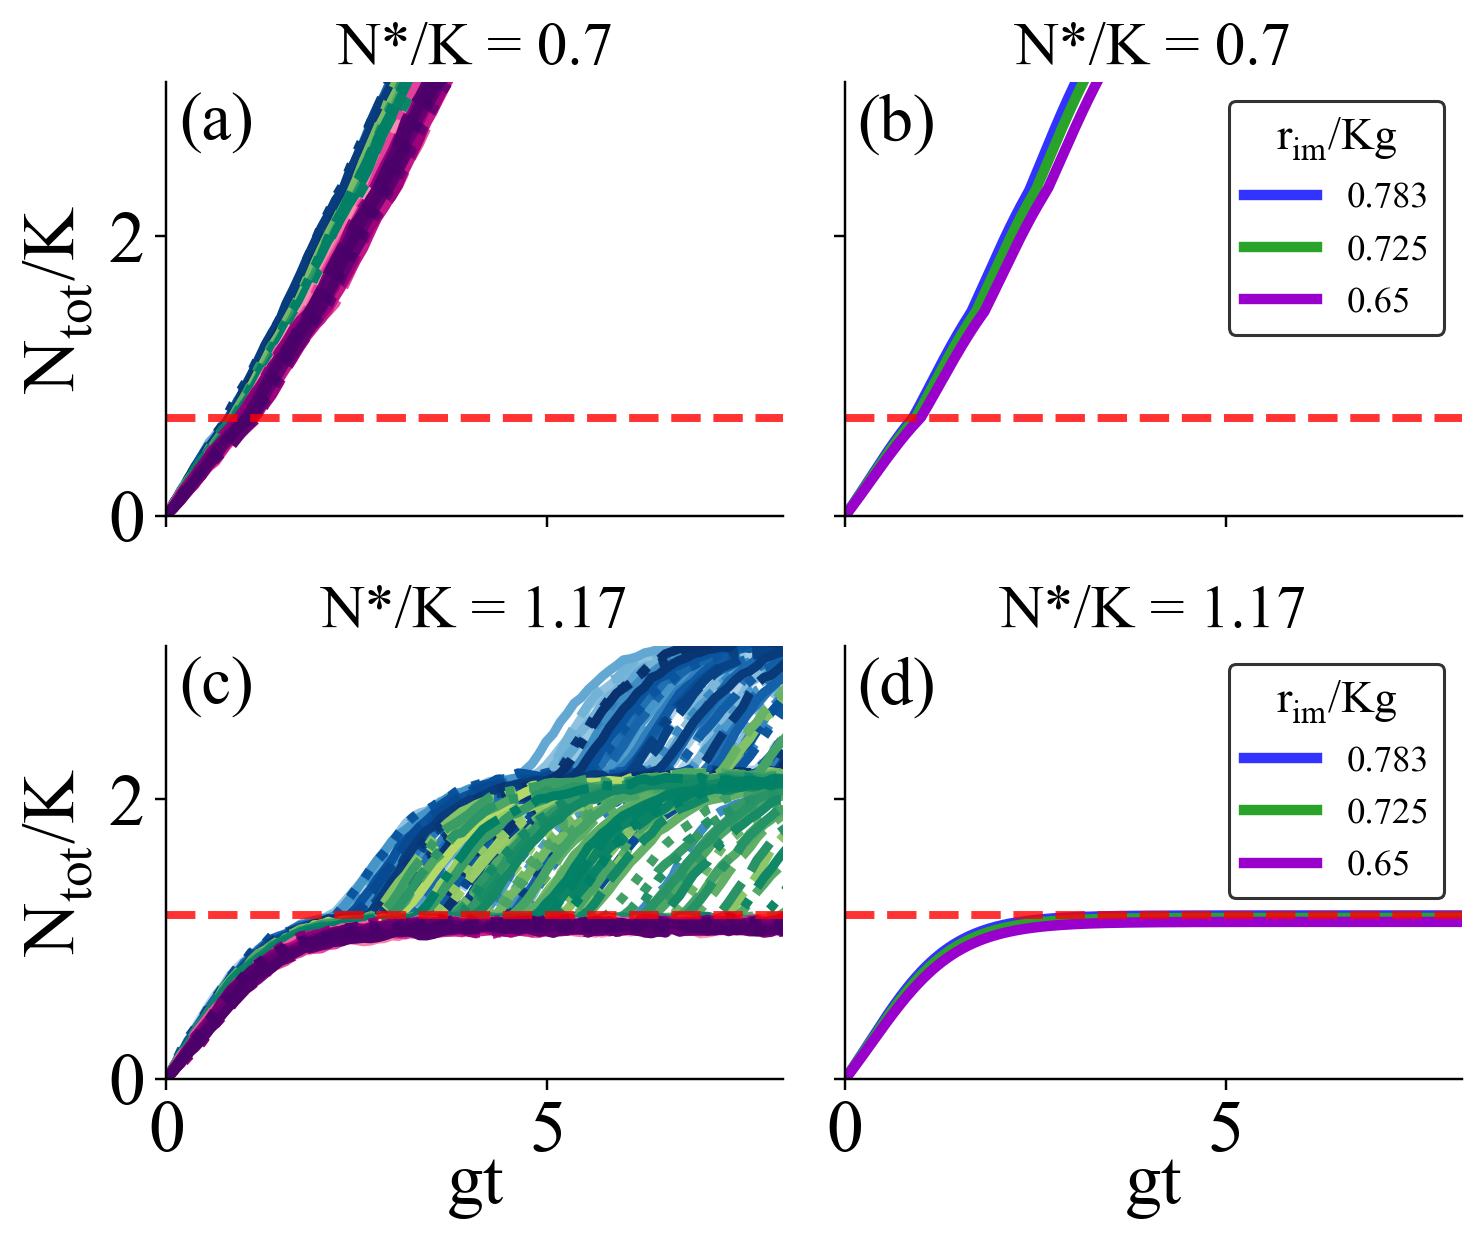

In [79]:
compareNThresh([0.65, 0.725, 0.783], fig4d_pops_deterministic_UPDATED, fig4c_pops_deterministic_UPDATED, fig4d_pops_stochastic_v2_K_1000, fig4c_pops_stochastic_v2_K_1000, 'fig4_N_thresh_comparison_v2_K_1000', K_value=1000)

